In [1]:
#Import Dependencies
%matplotlib inline
import pandas as pd
from sklearn.datasets import make_regression #NOT SURE THIS IS NEEDED
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the csv file into a pandas DataFrame
OpioidsAD = pd.read_csv('../../OpioidData/OPIOIDS_ByYear_WithCounty.csv')
OpioidsAD.head()

,AVG of CALC BASE WT IN GM,AVG of MME Conversion Factor,AVG of unit,Buyer City,Buyer Name,Buyer State,DOS,DosageUnit N,Number of Records,Reporter City,...,Reporter State,Reporter family,SUM of QUANTITY,Strength n,Transaction Year,buyer cityState,Buyer county,CountyStateYear,BuyerCountyPopulation,BuyerCountyDeaths
0,0.60540,1.0,0.0,ALBERTVILLE,VITAL CARE OF NORTH ALABAMA,AL,10.0,100.0,1,MCCALLA,...,AL,D & K Healthcare Resources,1,0.0,2006,albertville AL,Marshall,"marshall county, al 2006",NaN,NaN
1,0.45405,1.0,0.0,AUBURN,AUBURN DRUGS,AL,7.5,100.0,1,MCCALLA,...,AL,D & K Healthcare Resources,1,0.0,2006,auburn AL,Lee,"lee county, al 2006",NaN,NaN
2,3.02700,1.0,0.0,CHICKASAW,MEDICAL VILLAGE PHARMACY,AL,10.0,500.0,1,MCCALLA,...,AL,D & K Healthcare Resources,1,0.0,2006,chickasaw AL,Mobile,"mobile county, al 2006",402916.0,19.0
3,1.51350,1.0,0.0,CHILDERSBURG,J & J DRUG CO,AL,5.0,500.0,1,MCCALLA,...,AL,D & K Healthcare Resources,1,0.0,2006,childersburg AL,Talladega,"talladega county, al 2006",NaN,NaN
4,0.30270,1.0,0.0,DOUBLE SPRINGS,GATEWAY DISCOUNT DRUGS,AL,5.0,100.0,1,MCCALLA,...,AL,D & K Healthcare Resources,1,0.0,2006,double springs AL,Winston,"winston county, al 2006",NaN,NaN


In [3]:
#Get rid of columns that we don't need
OpioidsReduced = OpioidsAD.drop(OpioidsAD.columns[[0, 1, 2, 3, 4, 8, 14, 16, 18]], axis=1)
OpioidsReduced.head()

,Buyer State,DOS,DosageUnit N,Reporter City,Reporter Name,Reporter State,Reporter family,SUM of QUANTITY,Transaction Year,Buyer county,BuyerCountyPopulation,BuyerCountyDeaths
0,AL,10.0,100.0,MCCALLA,"D& K HEALTHCARE RESOURCES,",AL,D & K Healthcare Resources,1,2006,Marshall,NaN,NaN
1,AL,7.5,100.0,MCCALLA,"D& K HEALTHCARE RESOURCES,",AL,D & K Healthcare Resources,1,2006,Lee,NaN,NaN
2,AL,10.0,500.0,MCCALLA,"D& K HEALTHCARE RESOURCES,",AL,D & K Healthcare Resources,1,2006,Mobile,402916.0,19.0
3,AL,5.0,500.0,MCCALLA,"D& K HEALTHCARE RESOURCES,",AL,D & K Healthcare Resources,1,2006,Talladega,NaN,NaN
4,AL,5.0,100.0,MCCALLA,"D& K HEALTHCARE RESOURCES,",AL,D & K Healthcare Resources,1,2006,Winston,NaN,NaN


In [4]:
# Read the csv file with overdose data into a pandas DataFrame
OpioidDeaths = pd.read_csv('../Data/SummaryBuyers_Deathsv2.csv')
OpioidDeaths.head()

,Buyer State,Reporter State,Transaction Year,Total QUANTITY,Average of Strength,Average of DOS,Average of DosageUnit,Deaths Buyer state
0,AK,AK,2006,25580,0.000000,9.243488,367.328931,12
1,AK,AK,2007,27318,1.111111,8.959317,413.410806,12
2,AK,AK,2008,29816,0.000000,10.703696,439.934186,56
3,AK,AK,2009,31514,0.000000,9.855912,391.584806,83
4,AK,AK,2010,30101,0.000000,10.720634,425.409741,26


In [5]:
#Need to split and re-combine data in order to avoid double counting deaths (total deaths repeat for each line where the related county appears)
BuyerQuantity = OpioidDeaths.drop(OpioidDeaths.columns[[1, 4, 5, 6, 7]], axis=1)
BuyerQuantity.head()

,Buyer State,Transaction Year,Total QUANTITY
0,AK,2006,25580
1,AK,2007,27318
2,AK,2008,29816
3,AK,2009,31514
4,AK,2010,30101


In [6]:
#Group data by state and year
BuyerQuantity = BuyerQuantity.groupby(["Buyer State", "Transaction Year"]).sum().reset_index()
BuyerQuantity.head()

,Buyer State,Transaction Year,Total QUANTITY
0,AK,2006,63504
1,AK,2007,71997
2,AK,2008,79256
3,AK,2009,82841
4,AK,2010,87791


In [7]:
#drop columns from overdose data that we don't need
BuyerDeaths = OpioidDeaths.drop(OpioidDeaths.columns[[1, 3, 4, 5, 6]], axis=1)
BuyerDeaths.head()

,Buyer State,Transaction Year,Deaths Buyer state
0,AK,2006,12
1,AK,2007,12
2,AK,2008,56
3,AK,2009,83
4,AK,2010,26


In [8]:
#remove the duplicate observations to get rid of death double-counting
BuyerDeaths = BuyerDeaths.drop_duplicates().reset_index(drop=True)
BuyerDeaths.head(10)

,Buyer State,Transaction Year,Deaths Buyer state
0,AK,2006,12
1,AK,2007,12
2,AK,2008,56
3,AK,2009,83
4,AK,2010,26
5,AK,2011,46
6,AK,2012,52
7,AL,2006,69
8,AL,2007,120
9,AL,2008,114


In [9]:
#merge the df with quantity purchased and number of deaths on state and year
OpioidDeathsClean = pd.merge(BuyerQuantity, BuyerDeaths, on=["Buyer State", "Transaction Year"])
OpioidDeathsClean.columns = ["Buyer_State", "Transaction_Year", "Total_QUANTITY", "Deaths_Buyer_state"]
#OpioidDeathsClean['Buyer_State'] = OpioidDeathsClean['Buyer_State'].astype('|S')
OpioidDeathsClean = OpioidDeathsClean.sort_values(['Buyer_State', 'Transaction_Year'], ascending=[True, False]).reset_index(drop=True)
OpioidDeathsClean.head()

,Buyer_State,Transaction_Year,Total_QUANTITY,Deaths_Buyer_state
0,AK,2012,90042,52
1,AK,2011,90422,46
2,AK,2010,87791,26
3,AK,2009,82841,83
4,AK,2008,79256,56


In [10]:
# Read the csv file into a pandas DataFrame that includes population data
DeathData = pd.read_csv('../Data/opioidDeathsbyCounty.csv')
DeathData.head()

,Notes,County,State,County Code,Year,Year Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,NaN,Baldwin County,AL,1003,2006,2006,12,168121,Unreliable,Unreliable
1,NaN,Baldwin County,AL,1003,2007,2007,14,172404,Unreliable,Unreliable
2,NaN,Baldwin County,AL,1003,2008,2008,14,175827,Unreliable,Unreliable
3,NaN,Baldwin County,AL,1003,2009,2009,10,179406,Unreliable,Unreliable
4,NaN,Baldwin County,AL,1003,2010,2010,10,182265,Unreliable,Unreliable


In [11]:
#drop columns we don't need
DeathReduced = DeathData.drop(DeathData.columns[[0, 1, 3, 5, 8, 9]], axis=1)
DeathReduced.head()

,State,Year,Deaths,Population
0,AL,2006,12,168121
1,AL,2007,14,172404
2,AL,2008,14,175827
3,AL,2009,10,179406
4,AL,2010,10,182265


In [12]:
#group by state and year and sort data
DeathPop = DeathReduced.groupby(["State", "Year"]).sum().reset_index()
DeathPop.columns = ["Buyer_State", "Transaction_Year", "Deaths", "Population"]
DeathPop = DeathPop.sort_values(['Buyer_State', 'Transaction_Year'], ascending=[True, False]).reset_index(drop=True)
DeathPop.head()

,Buyer_State,Transaction_Year,Deaths,Population
0,AK,2012,52,392535
1,AK,2011,46,387516
2,AK,2010,26,291826
3,AK,2009,83,524596
4,AK,2008,56,365633


In [13]:
#merge the population data into the death/quantity data
OpioidDeathPop = pd.merge(OpioidDeathsClean, DeathPop, how = "left", on=["Buyer_State", "Transaction_Year"])
OpioidDeathPop = OpioidDeathPop.drop(OpioidDeathPop.columns[[4]], axis=1)
OpioidDeathPop.head()

,Buyer_State,Transaction_Year,Total_QUANTITY,Deaths_Buyer_state,Population
0,AK,2012,90042,52,392535.0
1,AK,2011,90422,46,387516.0
2,AK,2010,87791,26,291826.0
3,AK,2009,82841,83,524596.0
4,AK,2008,79256,56,365633.0


In [14]:
#Create a df for each year
OD2006 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2006].reset_index(drop=True)
OD2007 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2007].reset_index(drop=True)
OD2008 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2008].reset_index(drop=True)
OD2009 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2009].reset_index(drop=True)
OD2010 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2010].reset_index(drop=True)
OD2011 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2011].reset_index(drop=True)
OD2012 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2012].reset_index(drop=True)

In [15]:
OD2012.head()

,Buyer_State,Transaction_Year,Total_QUANTITY,Deaths_Buyer_state,Population
0,AK,2012,90042,52,392535.0
1,AL,2012,1072606,106,1398933.0
2,AR,2012,523276,42,832632.0
3,AZ,2012,1182229,497,5869987.0
4,CA,2012,5472031,1607,34830210.0


Begin Machine Learning - Linear Regression

In [16]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

OpioidDF = OD2012

X = OpioidDF.Total_QUANTITY.values.reshape(-1, 1)
y = OpioidDF.Deaths_Buyer_state.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (51, 1) (51, 1)


array([[  90042],
       [1072606],
       [ 523276],
       [1182229],
       [5472031],
       [ 743896],
       [ 481350],
       [  40199],
       [ 185484],
       [2786494],
       [1426999],
       [ 143015],
       [ 305828],
       [ 241248],
       [1127504],
       [1494162],
       [ 445912],
       [ 954271],
       [ 737236],
       [ 871452],
       [ 954992],
       [ 272130],
       [1562696],
       [ 532186],
       [1023931],
       [ 470178],
       [ 154344],
       [1697643],
       [  59694],
       [ 183068],
       [ 200489],
       [1079477],
       [ 327912],
       [ 607002],
       [2156572],
       [2128784],
       [ 775831],
       [ 866947],
       [2127377],
       [ 155988],
       [1507578],
       [  80484],
       [1514276],
       [2371508],
       [ 446789],
       [1150449],
       [  74975],
       [1135749],
       [ 837051],
       [ 476576],
       [  79464]], dtype=int64)

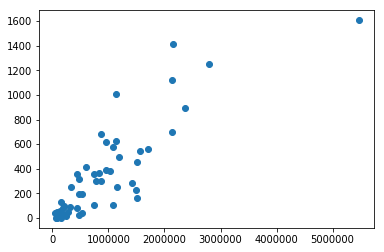

In [17]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [18]:
# Create the model and fit the model to the data

model = LinearRegression()

In [19]:
 # Fit the model to the data. 

model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[0.00034703]]
y-axis intercept:  [37.30674402]


In [21]:
# transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[40199]]
Max X Value: [[5472031]]


In [22]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)


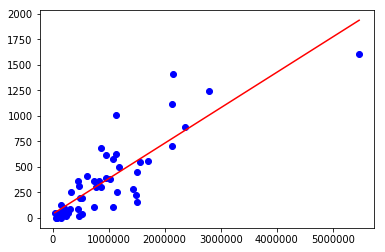

In [23]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')


Checking how statistically accurate the model is

In [24]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 38900.44819154301
R-squared (R2 ): 0.7284220209695873


In [25]:
# Overall Score for the model
model.score(X, y)

0.7284220209695873

In [26]:
#predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predicted[0]}")
print(f"Prediction Error: {predicted[0]-y[0]}")

True output: [52]
Predicted output: [68.5537666]
Prediction Error: [16.5537666]


In [27]:
yList = []
for list in y:
    for value in list:
        yList.append(value)
        
predictedList = []
for list in predicted:
    for value in list:
        predictedList.append(value)

error = y-predicted
errorList = []
for list in error:
    for value in list:
        errorList.append(value)


In [28]:
OpioidsPredictvActual = pd.DataFrame({"Predicted": predictedList, "Actual": yList, "Error": errorList})#[["Predicted", "Actual", "Error"]]
OpioidsPredictvActual.head()

,Predicted,Actual,Error
0,68.553767,52,-16.553767
1,409.530194,106,-303.530194
2,218.897746,42,-176.897746
3,447.572356,497,49.427644
4,1936.250306,1607,-329.250306


Calculating and modeling growth

In [29]:
TotalYOYPurchases = [OD2006["Total_QUANTITY"].sum(), OD2007["Total_QUANTITY"].sum(), OD2008["Total_QUANTITY"].sum(), OD2009["Total_QUANTITY"].sum(), OD2010["Total_QUANTITY"].sum(), OD2011["Total_QUANTITY"].sum(), OD2012["Total_QUANTITY"].sum()]
TotalYOYPurchases

[28107230, 31566603, 34542881, 38226473, 42900757, 47050374, 47337374]

In [30]:
first = TotalYOYPurchases[0]
last = TotalYOYPurchases[6]
periods = 7
    
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1

OpioidCAGR = CAGR(first, last, periods)
OpioidCAGR

0.07731045239115963

In [31]:
FutureQuantity = pd.DataFrame({"State":OD2012["Buyer_State"], "2012_Check": OD2012["Total_QUANTITY"], "PillQuantity2013": OD2012["Total_QUANTITY"]*(1+OpioidCAGR), "PillQuantity2014": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**2), "PillQuantity2015": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**3), "PillQuantity2016": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**4), "PillQuantity2017": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**5), "PillQuantity2018": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**6), "PillQuantity2019": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**7), "PillQuantity2020": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**8) })

In [32]:
FutureQuantity = FutureQuantity.round()
FutureQuantity.round()

,State,2012_Check,PillQuantity2013,PillQuantity2014,PillQuantity2015,PillQuantity2016,PillQuantity2017,PillQuantity2018,PillQuantity2019,PillQuantity2020
0,AK,90042,97003.0,104503.0,112582.0,121285.0,130662.0,140764.0,151646.0,163370.0
1,AL,1072606,1155530.0,1244864.0,1341105.0,1444787.0,1556484.0,1676816.0,1806452.0,1946109.0
2,AR,523276,563731.0,607313.0,654265.0,704846.0,759338.0,818043.0,881286.0,949419.0
3,AZ,1182229,1273628.0,1372092.0,1478169.0,1592447.0,1715560.0,1848191.0,1991075.0,2145006.0
4,CA,5472031,5895076.0,6350827.0,6841813.0,7370756.0,7940593.0,8554483.0,9215834.0,9928315.0
5,CO,743896,801407.0,863364.0,930111.0,1002018.0,1079485.0,1162940.0,1252848.0,1349706.0
6,CT,481350,518563.0,558654.0,601844.0,648372.0,698498.0,752500.0,810676.0,873349.0
7,DC,40199,43307.0,46655.0,50262.0,54148.0,58334.0,62844.0,67702.0,72936.0
8,DE,185484,199824.0,215272.0,231915.0,249845.0,269160.0,289969.0,312387.0,336537.0
9,FL,2786494,3001919.0,3233999.0,3484021.0,3753372.0,4043547.0,4356155.0,4692932.0,5055744.0


In [33]:
X_2013 = FutureQuantity.PillQuantity2013.values.reshape(-1, 1)
X_2014 = FutureQuantity.PillQuantity2014.values.reshape(-1, 1)
X_2015 = FutureQuantity.PillQuantity2015.values.reshape(-1, 1)
X_2016 = FutureQuantity.PillQuantity2016.values.reshape(-1, 1)
X_2017 = FutureQuantity.PillQuantity2017.values.reshape(-1, 1)
X_2018 = FutureQuantity.PillQuantity2018.values.reshape(-1, 1)
X_2019 = FutureQuantity.PillQuantity2019.values.reshape(-1, 1)
X_2020 = FutureQuantity.PillQuantity2020.values.reshape(-1, 1)
X_2020.shape

(51, 1)

In [34]:
predicted2013 = model.predict(X_2013)
predicted2014 = model.predict(X_2014)
predicted2015 = model.predict(X_2015)
predicted2016 = model.predict(X_2016)
predicted2017 = model.predict(X_2017)
predicted2018 = model.predict(X_2018)
predicted2019 = model.predict(X_2019)
predicted2020 = model.predict(X_2020)
predicted2020

array([[  94.00057665],
       [ 712.65948886],
       [ 366.78095521],
       [ 781.6821566 ],
       [3482.70203631],
       [ 505.69142948],
       [ 340.38259659],
       [  62.61751942],
       [ 154.0942347 ],
       [1791.78739624],
       [ 935.79866844],
       [ 127.35440132],
       [ 229.86762244],
       [ 189.20540507],
       [ 747.22547952],
       [ 978.08705524],
       [ 318.06944209],
       [ 638.15136227],
       [ 501.49795287],
       [ 586.00532102],
       [ 638.60527384],
       [ 208.65003279],
       [1021.23849866],
       [ 372.39099682],
       [ 682.01212928],
       [ 333.34835537],
       [ 134.48754528],
       [1106.20637189],
       [  74.89221829],
       [ 152.57321451],
       [ 163.54205005],
       [ 716.98587689],
       [ 243.77230803],
       [ 419.4978562 ],
       [1395.16515822],
       [1377.66874117],
       [ 525.79887913],
       [ 583.16906776],
       [1376.78278074],
       [ 135.5227274 ],
       [ 986.53404416],
       [  87.982

In [35]:

List2013 = []
for list in predicted2013:
    for value in list:
        List2013.append(value)
        
List2014 = []
for list in predicted2014:
    for value in list:
        List2014.append(value)

List2015 = []
for list in predicted2015:
    for value in list:
        List2015.append(value)

List2016 = []
for list in predicted2016:
    for value in list:
        List2016.append(value)

List2017 = []
for list in predicted2017:
    for value in list:
        List2017.append(value)

List2018 = []
for list in predicted2018:
    for value in list:
        List2018.append(value)

List2019 = []
for list in predicted2019:
    for value in list:
        List2019.append(value)

List2020 = []
for list in predicted2020:
    for value in list:
        List2020.append(value)
        
PredictedDeaths = pd.DataFrame({"State":OD2012["Buyer_State"], "Quantity2013":FutureQuantity["PillQuantity2013"], "Deaths2013":List2013, "Quantity2014":FutureQuantity["PillQuantity2014"], "Deaths2014":List2014, "Quantity2015":FutureQuantity["PillQuantity2015"], "Deaths2015":List2015, "Quantity2016":FutureQuantity["PillQuantity2016"], "Deaths2016":List2016, "Quantity2017":FutureQuantity["PillQuantity2017"], "Deaths2017":List2017, "Quantity2018":FutureQuantity["PillQuantity2018"], "Deaths2018":List2018, "Quantity2019":FutureQuantity["PillQuantity2019"], "Deaths2019":List2019, "Quantity2020":FutureQuantity["PillQuantity2020"], "Deaths2020":List2020})
PredictedDeaths.round()

,State,Quantity2013,Deaths2013,Quantity2014,Deaths2014,Quantity2015,Deaths2015,Quantity2016,Deaths2016,Quantity2017,Deaths2017,Quantity2018,Deaths2018,Quantity2019,Deaths2019,Quantity2020,Deaths2020
0,AK,97003.0,71.0,104503.0,74.0,112582.0,76.0,121285.0,79.0,130662.0,83.0,140764.0,86.0,151646.0,90.0,163370.0,94.0
1,AL,1155530.0,438.0,1244864.0,469.0,1341105.0,503.0,1444787.0,539.0,1556484.0,577.0,1676816.0,619.0,1806452.0,664.0,1946109.0,713.0
2,AR,563731.0,233.0,607313.0,248.0,654265.0,264.0,704846.0,282.0,759338.0,301.0,818043.0,321.0,881286.0,343.0,949419.0,367.0
3,AZ,1273628.0,479.0,1372092.0,513.0,1478169.0,550.0,1592447.0,590.0,1715560.0,633.0,1848191.0,679.0,1991075.0,728.0,2145006.0,782.0
4,CA,5895076.0,2083.0,6350827.0,2241.0,6841813.0,2412.0,7370756.0,2595.0,7940593.0,2793.0,8554483.0,3006.0,9215834.0,3235.0,9928315.0,3483.0
5,CO,801407.0,315.0,863364.0,337.0,930111.0,360.0,1002018.0,385.0,1079485.0,412.0,1162940.0,441.0,1252848.0,472.0,1349706.0,506.0
6,CT,518563.0,217.0,558654.0,231.0,601844.0,246.0,648372.0,262.0,698498.0,280.0,752500.0,298.0,810676.0,319.0,873349.0,340.0
7,DC,43307.0,52.0,46655.0,53.0,50262.0,55.0,54148.0,56.0,58334.0,58.0,62844.0,59.0,67702.0,61.0,72936.0,63.0
8,DE,199824.0,107.0,215272.0,112.0,231915.0,118.0,249845.0,124.0,269160.0,131.0,289969.0,138.0,312387.0,146.0,336537.0,154.0
9,FL,3001919.0,1079.0,3233999.0,1160.0,3484021.0,1246.0,3753372.0,1340.0,4043547.0,1441.0,4356155.0,1549.0,4692932.0,1666.0,5055744.0,1792.0


In [36]:
TotalDeaths2020 = PredictedDeaths["Deaths2020"].sum()
MNDeaths2020 = PredictedDeaths["Deaths2020"][23]

In [37]:
print(f"Total Predicted Opioid Overdose Deaths - US: {TotalDeaths2020}, MN: {MNDeaths2020}")

Total Predicted Opioid Overdose Deaths - US: 31708.022898586245, MN: 372.39099682073163


In [38]:
PredictedDeaths.to_csv(r'..\Data\Predicted_Deaths.csv')